## Diffrational theory of the image. Abbe's theory of image formation with coherent illumination

During the study of the effects of diffraction, we have seen that the presence of an aperture with a certain width modifies the irradiance observed in a screen located behind said aperture. The smaller its size, the wave front of the incident light will be more cut, and the beam will move further away from the rectilinear propagation. More specifically, if we have a circular aperture, the size of the Airy spot on the screen will be greater when the aperture is smaller.

If we transfer these observations to the formation of the image by an optical system, we can assume that the effects of diffraction will play an important role. Since any optical system, either by the presence of diaphragms or by the lens mount itself, limits the extent of the beam that enters it, the image of a point will not be another point as predicted by the Geometric Optics for perfect systems, but a stain of some extension.

In the present notebook we will describe Abbe's theory of image formation when the object is illuminated with coherent light. This case occurs especially in the visualization of small objects through a microscope. According to Abbe, the object acts as a diffraction network, so we have to take into account the interference between the secondary waves emitted by each point of the object.

[More on the life and achievements of Abbe](http://www.osa-opn.org/home/articles/volume_18/issue_2/features/ernst_abbe_and_the_foundation_of_scientific_micros/#.UZILjaq0V4c)

To illustrate this theory, we are going to analyze the case in which the object is properly a diffraction grating with step $ d $ and that is illuminated by a monochromatic plane wave that falls perpendicularly to the network. If we focus on what we obtain in the focal plane image of the optical system, we already know that in that plane we will have the different diffraction orders given by the grating equation

$$ d sin (\theta) = m \lambda $$

Taking into account that $ tan(\theta) = y / f '$, where $ y $ is the distance to the axis of a point in the focal plane, we can know where we will have the maximum irradiance corresponding to each diffraction order,

$$ y = \frac{m \lambda f'}{d} $$

where in this last expression the approximation $ sin (\theta) \sim tan(\theta) = y / f '$ has been made.


Each of these points can be considered as a secondary wave emitting center, whose amplitude will depend on the amplitude of that diffraction order. These secondary waves will interfere with each other, giving rise to the image of the network in the plane predicted by the Geometric Optics. In order to have a faithful image of the network, we will have to add the contributions of all the diffraction orders, since they all carry information of the shape of the grating. However, the finite size of the opening of the system will have as a consequence that we can cut the higher diffraction orders, and therefore modify the final image. This problem is partly alleviated by the decrease in the amplitude of the higher orders, and therefore, their contribution to the image will also be less.

Let's see it with the following code. In it is the distance `D` between the image plane and the focal plane of the system, the position in this plane of the diffraction orders (` yfoc` in the code) and the waves emitted by each of these points are summed with the corresponding phase shift between them due to the difference of optical time (this point is similar to how we find the irradiance given by a diffraction grating on a screen at a certain distance). Finally the parameter `norder` gives us the number of orders that we include in the sum.

* Proposal: Change the number `norder` to limit the number of diffraction orders that contribute to the final image. See how this change affects the final image.

Populating the interactive namespace from numpy and matplotlib


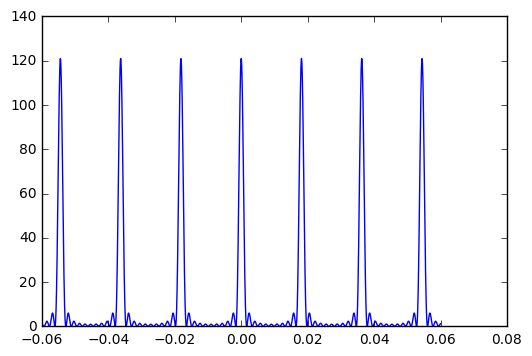

In [1]:
% pylab inline
# The different energy of each diffraction order is not taken into account
Lambda = 555e-6 # wavelength in mm
k = 2.0 * pi / Lambda
focal = 200.0 # mm
sobj = -300.0 # mm
sim = 1.0 / (1.0 / focal + 1.0 / sobj)
D = sim - focal
norder = 5
m_vec = np.arange (norder * 2 + 1) -norder
d = 1.0 / 100 # step of the network in mm
theta_m = np.arcsin (Lambda * m_vec / d)
yfoc = focal * tan (theta_m)

x_p = linspace (-0.06, .06,5000)
Delta = (yfoc [1] -yfoc [0]) * x_p / D
N = len (m_vec)
E0 = 1.0
phases = zeros (((N), len (x_p)), dtype = complex)
for i in range (len (phases)):
     phases [i ,:] = 1j * k * i * Delta
Etotal = sum (exp (phases), axis = 0) * E0
Itotal = abs (Etotal) ** 2

plot (x_p, Itotal)


We have seen previously that the finite diameter of the system can limit the higher orders, which can lead to a loss of fidelity of the final image since the interference is made with a smaller number of waves. However we can also use this approach to study the formation of the image with coherent lighting to modify the final image to our will. That is, what happens for example if we block the order 0 and keep only the order 1 and -1?

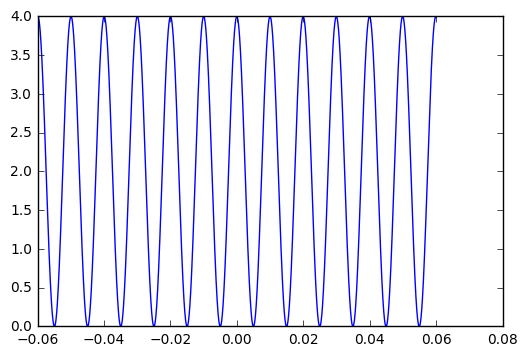

In [2]:
norder = 1
m_vec = np.arange (norder * 2 + 1) -norder
theta_m = np.arcsin (Lambda * m_vec / d)
yfoc = focal * tan (theta_m)


Delta = (yfoc [1] -yfoc [0]) * x_p / D
N = len (m_vec)
E0 = 1.0
phases = zeros (((N), len (x_p)), dtype = complex)
for i in range (len (phases)):
     phases [i ,:] = 1j * k * i * Delta
Etotal = sum (exp (phases), axis = 0) * E0
#remove contribution from zero order
indzero = np.where (m_vec == 0)
Etotal = (sum (exp (phases), axis = 0) -exp (phases [indzero [0] [0],:])) * E0
Itotal = abs (Etotal) ** 2
plot (x_p, Itotal)

We see that we obtain an image of cosine form, that is, interference stripes. This result was predictable because according to the arrangement we have set, we have two point sources separated by a certain distance, that is, a case analogous to Young's experiment. The separation between maxima (interstripe) can be observed that is equal to $ 0.01 \; \; $ mm. It should be noted that this separation is not the expected spatial period of the final image. This period will be modified by the lateral increase of the system and will be given by $ d '= \beta d $, where $ \beta = s' / s $. In our case, that gives us a spatial period of the image $ d '= 0.02 \; \; $ mm

### Phase Contrast Method.

Although the previous example allows us to guess that by acting on the focal plane of the lens we can modify the final image, it does not give a clear idea of ​​the applications that this procedure could have. To exemplify these applications we will see very briefly what the phase contrast method consists of. This method of observation was introduced by Zernike and he was awarded the Nobel Prize in 1953.

The phase contrast method allows us to visualize transparent objects where, therefore, there is no change in the amplitude of the wave transmitted through them, although there is a change in the phase of that wave, due to the optical path difference when crossing the object. Objects of this type are frequently found in biology or crystallography and because they do not change the amplitude of the wave, it is not possible to observe them with traditional microscopy techniques.

Themethodology is to act in the focal plane image of the optical system to transform those phase changes in the object in changes in the irradiance in the image plane. More specifically, we place a thin sheet in the image focal plane so that we introduce a phase shift of $ \pi / 2 $ in the diffraction zero order located on the axis. It can be shown that this change in the phase of the zero order causes the phase changes introduced by the object to be transformed into changes in the irradiance in the final image, allowing the object to be visualized in this way.

Let's see this briefly. If the object produces a one-dimensional variation of the phase $ \phi (x) \; \; $, the transmission function of the object will be $ F (x) = e ^ {i \phi (x)} \; \; $ , that if the phase variation is small, it can be approximated by $ F (x) \simeq 1 + i \phi (x) \; \; $. The optical system will therefore give an image with an irradiance,

$$ I_{im} \propto | 1 + i \phi(x) |^ 2 \simeq 1 $$

where it has been considered that the phase $ \phi(x) $ is small. It can be seen therefore that the irradiance is basically constant in the image plane. However, if we act on the focal plane by changing the phase of the diffraction zero order, it can be shown that the irradiance is then,

$$ I_{im} \propto | \pm i + i \phi(x) |^ 2 \simeq 1 \pm 2 \phi(x) $$

Therefore the irradiance in the image plane changes, being proportional to the phase changes introduced by the object. The sign of the last term depends on the phase shift introduced by the sheet in the focal plane.

A deeper development of this method is beyond the scope of this course, but you can consult more about the method of phase contrast for example in the following links and the bibliography:

[Introduction to the phase contrast method (in English)](http://www.microscopyu.com/articles/phasecontrast/phasemicroscopy.html)

[Theory of the Microscope](http://www.leica-microsystems.com/fileadmin/downloads/Leica%20DM750%20P/Brochures/Leica_Theory_of_the_microscope_RvA-Booklet_ES.pdf) [PDF]